# **Random Forest**


In [ ]:
# STEP 1: Import required Python libraries

# numpy: for working with numerical data and arrays
import numpy as np

# pandas: for creating and managing structured data using DataFrames
import pandas as pd

# RandomForestClassifier: machine learning model from sklearn that builds an ensemble of decision trees
from sklearn.ensemble import RandomForestClassifier

# accuracy_score, confusion_matrix, classification_report:
# Used for evaluating the performance of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# train_test_split: splits dataset into training and testing sets
from sklearn.model_selection import train_test_split

# matplotlib and seaborn: for visualizations like confusion matrix and feature importance
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# STEP 2: Simulate a simple product review dataset

# Set a random seed so results are consistent every time you run the code
np.random.seed(42)

# Generate 100 synthetic data points
# 'satisfaction' ranges from 1 to 10 (how satisfied a customer is)
satisfaction = np.random.randint(1, 11, 100)

# 'price_sensitive' is either 0 or 1 (0 = not sensitive, 1 = very sensitive)
price_sensitive = np.random.randint(0, 2, 100)

# Define the outcome based on a simple rule:
# If satisfaction is high AND the customer is NOT price-sensitive, we assume the product succeeds
product_success = ((satisfaction > 6) & (price_sensitive == 0)).astype(int)

# Combine everything into a pandas DataFrame
df = pd.DataFrame({
    'satisfaction': satisfaction,
    'price_sensitive': price_sensitive,
    'product_success': product_success
})

# Print the first few rows of the dataset to check what it looks like
print("First few rows of our dataset:")
print(df.head())


First few rows of our dataset:
   satisfaction  price_sensitive  product_success
0             7                1                0
1             4                1                0
2             8                0                1
3             5                1                0
4             7                0                1


In [ ]:

# STEP 3: Split the dataset into features and labels

# 'X' contains the input features
X = df[['satisfaction', 'price_sensitive']]

# 'y' contains the target/output (1 = success, 0 = failure)
y = df['product_success']


# STEP 4: Split the data into training and test sets

# We'll use 80% of the data for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




In [ ]:
# STEP 5: Initialize and train the Random Forest model

# n_estimators = number of trees in the forest (more trees = more robust but slower)
# max_depth = limits how deep each tree can grow (to avoid overfitting)
# random_state ensures the results are repeatable
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Get model predictions (from RandomForestClassifier)
y_pred = model.predict(X_test)
# STEP 6: Make predictions on the test data

#y_pred = model.predict(X_test)

In [ ]:
# STEP 6: Get individual predictions from each decision tree and show majority voting

# Convert test data to NumPy array to avoid feature name mismatch warnings
X_test_np = X_test.to_numpy()

# Access all decision trees from the trained Random Forest
all_trees = model.estimators_

print("\n Individual Tree Predictions on Test Data:\n")

# Store predictions from all trees
all_tree_preds = []

# Loop through each tree and collect predictions
for i, tree in enumerate(all_trees):
    tree_pred = tree.predict(X_test_np)  # Predict using raw NumPy array
    all_tree_preds.append(tree_pred)
    print(f"Tree {i+1} predictions: {tree_pred.tolist()}")

# Convert predictions list to NumPy array and transpose
# Shape becomes [n_samples, n_trees] for easy voting per sample
all_tree_preds = np.array(all_tree_preds).astype(int).T

# Perform manual majority voting
final_preds_by_voting = []

print("\n Final prediction by majority voting (per sample):\n")
for i, votes in enumerate(all_tree_preds):
    vote_counts = np.bincount(votes)            # Count 0s and 1s
    predicted_class = np.argmax(vote_counts)     # Class with max votes
    final_preds_by_voting.append(predicted_class)

    print(f"Sample {i+1}: Votes = {votes.tolist()} → Final Prediction = {predicted_class}")

# Check if our manual voting matches scikit-learn's final prediction
#print("\n Do manual majority votes match model predictions?")
#print(np.array_equal(final_preds_by_voting, y_pred.tolist()))



 Individual Tree Predictions on Test Data:

Tree 1 predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Tree 2 predictions: [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
Tree 3 predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Tree 4 predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Tree 5 predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Tree 6 predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Tree 7 predictions: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
Tree 8 predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.

In [ ]:
# STEP 7: Evaluate the model's performance

# Print the accuracy (percentage of correct predictions)
print("\n Accuracy on test data:", accuracy_score(y_test, y_pred))

# Print a detailed classification report: precision, recall, F1-score
print("\n Classification Report:")
print(classification_report(y_test, y_pred))






 Accuracy on test data: 1.0

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


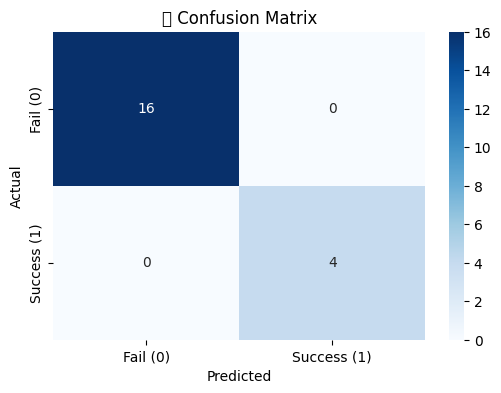

In [ ]:
# STEP 8: Confusion Matrix – visualize how many predictions were correct/incorrect

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Use seaborn to draw a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail (0)', 'Success (1)'],
            yticklabels=['Fail (0)', 'Success (1)'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📉 Confusion Matrix")
plt.show()


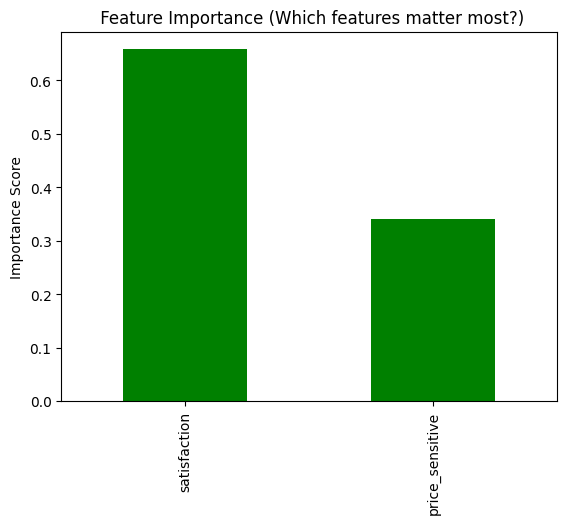

In [ ]:

# STEP 9: Visualize Feature Importance

# Random Forest can tell us which features were most important in decision-making
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot a bar chart to show feature importance
feature_importances.plot(kind='bar', color='green')
plt.title(" Feature Importance (Which features matter most?)")
plt.ylabel("Importance Score")
plt.show()


# **Ada Boost**

In [ ]:
# STEP 1: Import the necessary libraries

import numpy as np
import pandas as pd

# AdaBoostClassifier for the model
from sklearn.ensemble import AdaBoostClassifier

# We'll use DecisionTreeClassifier as our weak learner (base estimator)
from sklearn.tree import DecisionTreeClassifier

# For model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# STEP 2: Simulate the product review dataset (same as before for comparison)

np.random.seed(42)

# Feature 1: Satisfaction score (1–10)
satisfaction = np.random.randint(1, 11, 100)

# Feature 2: Price sensitivity (0 = not sensitive, 1 = very sensitive)
price_sensitive = np.random.randint(0, 2, 100)

# Target: Product success (1) or failure (0)
# Logic: High satisfaction & not price-sensitive → Success
product_success = ((satisfaction > 6) & (price_sensitive == 0)).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    'satisfaction': satisfaction,
    'price_sensitive': price_sensitive,
    'product_success': product_success
})


In [ ]:
# STEP 3: Prepare features and labels
X = df[['satisfaction', 'price_sensitive']]
y = df['product_success']

# STEP 4: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# STEP 5: Create and train the AdaBoost model

# We use a shallow decision tree (stump) as the base learner
base_learner = DecisionTreeClassifier(max_depth=1)

# AdaBoostClassifier parameters:
# n_estimators: number of boosting rounds
# learning_rate: controls how much each model contributes
# base_estimator: weak learner to use (default is DecisionTree with depth=1)
model = AdaBoostClassifier(
    estimator=base_learner,
    n_estimators=20,
    learning_rate=1.0,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


 Round 1: Error Rate = 0.3000 | Accuracy = 0.7000
 Round 2: Error Rate = 0.2000 | Accuracy = 0.8000
 Round 3: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 4: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 5: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 6: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 7: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 8: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 9: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 10: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 11: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 12: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 13: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 14: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 15: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 16: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 17: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 18: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 19: Error Rate = 0.0000 | Accuracy = 1.0000
 Round 20: Error Rate = 0.0000 | Accurac

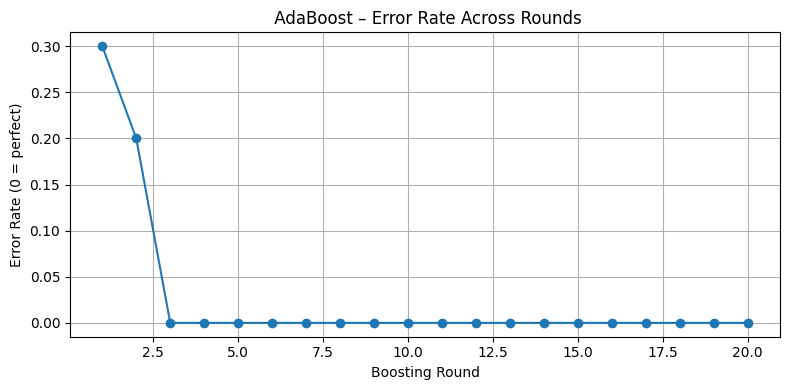

In [ ]:
# First, re-train AdaBoost model so we can inspect details during training
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Use shallow trees (stumps)
base_learner = DecisionTreeClassifier(max_depth=1)

# Train AdaBoost model
model = AdaBoostClassifier(
    estimator=base_learner,
    n_estimators=20,
    learning_rate=1.0,
    random_state=42
)

model.fit(X_train, y_train)

# Track error after each boosting round
errors = []

# Use staged_predict() to get predictions after each round
from sklearn.metrics import zero_one_loss

for i, y_stage_pred in enumerate(model.staged_predict(X_test), start=1):
    err = zero_one_loss(y_test, y_stage_pred)  # 1 - accuracy
    errors.append(err)
    print(f" Round {i}: Error Rate = {err:.4f} | Accuracy = {1 - err:.4f}")

# Plot error trend
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(errors)+1), errors, marker='o', linestyle='-')
plt.title(" AdaBoost – Error Rate Across Rounds")
plt.xlabel("Boosting Round")
plt.ylabel("Error Rate (0 = perfect)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# STEP 6: Make predictions on test data
y_pred = model.predict(X_test)


# STEP 7: Evaluate performance

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on Test Data: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



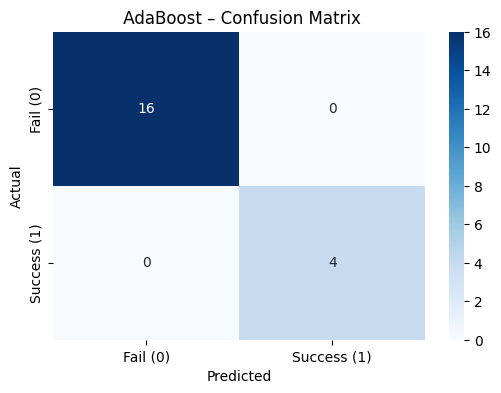

In [ ]:
# STEP 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail (0)', 'Success (1)'],
            yticklabels=['Fail (0)', 'Success (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" AdaBoost – Confusion Matrix")
plt.show()


# **Generalized Stacking (Without Cross-Validation)**

In [ ]:
# STEP 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# STEP 2: Simulate product review dataset
np.random.seed(42)
satisfaction = np.random.randint(1, 11, 100)
price_sensitive = np.random.randint(0, 2, 100)
product_success = ((satisfaction > 6) & (price_sensitive == 0)).astype(int)

df = pd.DataFrame({
    'satisfaction': satisfaction,
    'price_sensitive': price_sensitive,
    'product_success': product_success
})

X = df[['satisfaction', 'price_sensitive']].values
y = df['product_success'].values

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Define base learners
base_models = [
    ('tree', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('logreg', LogisticRegression())
]

# STEP 5: Train base models and generate meta-features (NO CV used)
meta_train = np.column_stack([
    model.fit(X_train, y_train).predict(X_train) for _, model in base_models
])

meta_test = np.column_stack([
    model.predict(X_test) for _, model in base_models
])

# STEP 6: Train the meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
meta_model.fit(meta_train, y_train)

# STEP 7: Predict with stacked model
final_preds = meta_model.predict(meta_test)

# STEP 8: Evaluate accuracy
accuracy = accuracy_score(y_test, final_preds)
print("Stacking (No CV) Accuracy on Test Set:", accuracy)


Stacking (No CV) Accuracy on Test Set: 1.0


# **Generalized Stacking with Cross-Validation**

In [ ]:
# STEP 1: Import necessary libraries
import numpy as np
import pandas as pd

# Base models and meta model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model training and evaluation
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

# STEP 2: Simulate product review dataset
np.random.seed(42)

# Features
satisfaction = np.random.randint(1, 11, 100)        # scores 1–10
price_sensitive = np.random.randint(0, 2, 100)      # 0 or 1

# Target label
product_success = ((satisfaction > 6) & (price_sensitive == 0)).astype(int)

# Combine into DataFrame
df = pd.DataFrame({
    'satisfaction': satisfaction,
    'price_sensitive': price_sensitive,
    'product_success': product_success
})

# STEP 3: Split data into train and test
X = df[['satisfaction', 'price_sensitive']].values
y = df['product_success'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 4: Define base learners
base_models = [
    ('tree', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('logreg', LogisticRegression())
]

# STEP 5: Create out-of-fold predictions for training meta-model

# Initialize matrix to hold meta-features (1 column per base model)
meta_features = np.zeros((X_train.shape[0], len(base_models)))

# Use 5-fold cross-validation to build out-of-fold predictions
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Generate out-of-fold predictions
for idx, (name, model) in enumerate(base_models):
    oof_preds = np.zeros(X_train.shape[0])

    for train_idx, val_idx in kf.split(X_train):
        # Train on 4 folds
        model.fit(X_train[train_idx], y_train[train_idx])
        # Predict on the held-out fold
        oof_preds[val_idx] = model.predict(X_train[val_idx])

    # Store predictions as a new feature column
    meta_features[:, idx] = oof_preds

# STEP 6: Train all base models on the full training data
# We'll use these later to predict on the test set
for _, model in base_models:
    model.fit(X_train, y_train)

# STEP 7: Generate meta-features for the test set
# These are predictions from the base models on the test data
meta_test = np.column_stack([
    model.predict(X_test) for _, model in base_models
])

# STEP 8: Train the meta-model (stacker)
# We use Random Forest as the meta-learner here
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
meta_model.fit(meta_features, y_train)

# STEP 9: Final prediction using the stacked model
final_preds = meta_model.predict(meta_test)

# STEP 10: Evaluate performance
accuracy = accuracy_score(y_test, final_preds)

print(" Generalized Stacking Accuracy on Test Set:", accuracy)


 Generalized Stacking Accuracy on Test Set: 1.0


Why Results Look Similar in Your Case
Reason	Explanation
* Simple dataset	The dataset is synthetic and generated from a rule. Models can learn it easily, so both versions of stacking perform well.
* Low noise	There's very little randomness or mislabeled data. So overfitting doesn't cause big errors.
* Small number of base models	With only 2 features and 3 simple base models, there's not much risk of redundancy.
* Test set is small	Accuracy differences may not appear over just 20 samples in the test set.
--------------------------------------------------------------------------------
When You Would See a Difference
Case	What Happens
* Complex, real-world data	Models may overfit on training data, causing naive stacking (no CV) to perform worse.
* Noisy labels	Overfitting amplifies noise. CV stacking is more robust.
* More diverse models	Meta-model benefits more from accurate OOF (out-of-fold) predictions.
* More folds (larger data)	CV stacking becomes more stable and less biased.
